In [1]:
import numpy as np
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt

In [1]:
# Generate PBS script
def generate_pbs_script(param, filename):
    script = f"""\
#PBS -l walltime=70:00:00
#PBS -l select=1:ncpus=1:mem=2gb
#PBS -J 1-300

module load anaconda3/personal
source activate motifenv

cd $HOME/branching_superspreading/gnn_version/
python3 branching_cluster_ic_v3.py {param} $PBS_ARRAY_INDEX –o output.txt
"""
    with open(filename, 'w') as f:
        f.write(script)

# Define parameters
parameters = range(100, 90)  # Replace this with the range of parameters you want

# Generate scripts
for param in [0]:
    filename = f"branching_{param}.pbs"  # Name the file related to the parameter
    generate_pbs_script(param, filename)

In [6]:
## note previously i use python_cutoff

In [9]:
def generate_pbs_script(param, filename):
    script = f"""\
#PBS -l walltime=70:00:00
#PBS -l select=1:ncpus=1:mem=8gb
#PBS -J 1-300

module load anaconda3/personal
source activate motifenv

cd $HOME/branching_superspreading/python_no_cutoff/
python3 branching_cluster_ic_v2-exp.py {param} $PBS_ARRAY_INDEX –o output.txt
"""
    with open(filename, 'w') as f:
        f.write(script)


# Generate scripts 
for param in range(9):
    filename = f"branching_{param}.pbs"  # Name the file related to the parameter
    generate_pbs_script(param, filename)

In [7]:
#### for lc's cluster submit
def generate_pbs_script(param, filename):
    script = f"""\
#PBS -l walltime=70:00:00
#PBS -l select=1:ncpus=1:mem=8gb
#PBS -J 1-300

module load anaconda3/personal
source activate pytorch_env

cd $HOME/qing_branching/python_no_cutoff/
python3 branching_cluster_ic_v2.py {param} $PBS_ARRAY_INDEX –o output.txt
"""
    with open(filename, 'w') as f:
        f.write(script)


# Generate scripts 
for param in range(4):
    filename = f"branching_{param}.pbs"  # Name the file related to the parameter
    generate_pbs_script(param, filename)

In [3]:
rs = np.array([20, 10., 2, 1, 0.5, 0.2, 0.1, 0.05, 0.025])

In [14]:
rs = np.array([20, 10, 2.0, 1.0, 0.5, 0.2, 0.1, 0.05, 0.025, 5.   ,  2.5  , 13.333,  3.333,  1.333,  0.667,  0.286,  0.133,
        0.067,  0.033,0.37,7.4])

# rs = np.array([20, 10, 2.0, 1.0, 0.5, 0.2, 0.1, 0.05, 0.025, 5.   ,  2.5  , 13.333,  3.333,  1.333,  0.667,  0.286,  0.133,
#         0.067,  0.033, 0.37,7.4])

In [15]:
rs[10]

2.5

In [5]:
rs.sort()

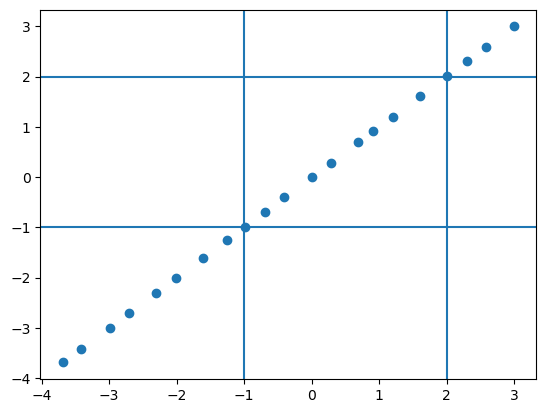

In [30]:
plt.scatter(np.log(rs), np.log(rs))
plt.axhline(2)
plt.axvline(2)
plt.axhline(-1)
plt.axvline(-1)

In [5]:
over_rs = 1/rs

In [7]:
over_rs.sort()

In [8]:
over_rs

array([ 0.05      ,  0.07500188,  0.1       ,  0.2       ,  0.30003   ,
        0.4       ,  0.5       ,  0.75018755,  1.        ,  1.49925037,
        2.        ,  3.4965035 ,  5.        ,  7.51879699, 10.        ,
       14.92537313, 20.        , 30.3030303 , 40.        ])

In [9]:
over_rs_add = [0.08, 0.25, 2.5, 12.5]
# for i in range(9-1):
#     over_rs_add.append(over_rs[i] + (over_rs[i+1] - over_rs[i])/2)

In [14]:
ra_add = 1/np.array(over_rs_add)

In [13]:
np.array(over_rs_add)

array([ 0.075,  0.3  ,  0.75 ,  1.5  ,  3.5  ,  7.5  , 15.   , 30.   ])

In [15]:
np.round(rs_add,3)

array([12.5 ,  4.  ,  0.4 ,  0.08])

In [4]:
# rs_selected = [0,1,2,3,4,5,6,25,49] ### select some r values
# rs = rs[rs_selected]
# R0s = np.arange(1.5, 6.5, 0.1)
R0s = np.array([2.5])
# rs = np.array([20, 10., 2, 1, 0.5, 0.2, 0.1, 0.05, 0.025])
# rs_add = np.array([5, 2.5, 1/0.075, 1/0.3, 1/0.75, 2/3, 1/3.5, 1/7.5, 1/15, 1/30])
rs_add = np.array([12.5 ,  4.  ,  0.4 ,  0.08])
# rs_original = np.array([20, 10., 2, 1, 0.5, 0.2, 0.1, 0.05, 0.025])
# rs_add = set(rs) - set(rs_original) 

In [9]:
# rs_add = np.array(list(rs_add))

In [5]:
# R0s = R0s[7:] ### finish the rest of R0 values
param_grid = {'R0': R0s, 'r' : rs}
grid = ParameterGrid(param_grid)
para_dict = list(grid)

In [7]:
np.save('para_dict-exp',para_dict)

In [8]:
len(para_dict)

9

In [15]:
para_list = []
for h in range(18):
    para_list.extend(list(range(9*h+6,9*h+7)))

In [21]:
para_dict = np.load('para_dict.npy',allow_pickle=True)
    ## set parameters
for i in para_list:
    para_i = para_dict[i]
    R0 = para_i['R0']
    r = para_i['r']
    print(i, R0, r)

6 1.5 0.1
15 1.6 0.1
24 1.7000000000000002 0.1
33 1.8000000000000003 0.1
42 1.9000000000000004 0.1
51 2.0000000000000004 0.1
60 2.1000000000000005 0.1
69 2.2000000000000006 0.1
78 2.3000000000000007 0.1
87 2.400000000000001 0.1
96 2.500000000000001 0.1
105 2.600000000000001 0.1
114 2.700000000000001 0.1
123 2.800000000000001 0.1
132 2.9000000000000012 0.1
141 3.0000000000000013 0.1
150 3.1000000000000014 0.1
159 3.2000000000000015 0.1


In [10]:
print (len(para_dict))

450


In [ ]:
for i in {0..3}
do
   qsub branching_${i}.pbs
done